In [80]:
from getpass import getpass


fred_key = getpass("Enter your FRED API key: ")

Enter your FRED API key: ··········


In [81]:
!pip install fredapi > /dev/null

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 500)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

# Fred object initialization
fred = Fred(api_key=fred_key)

In [82]:
import pandas as pd
import time
import plotly.express as px

# US States
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
          "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
          "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
          "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
          "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
          "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
          "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia",
          "Wisconsin", "Wyoming"]

state_series_ids = {}

for state in states:
    search_result = fred.search(f"Unemployment Rate in {state}", filter=('frequency', 'Monthly'))

    if not search_result.empty:
        best_match = search_result[
            (search_result['seasonal_adjustment'] == "Seasonally Adjusted") &
            (search_result['units'] == "Percent")
        ]

        # Take the first available if no seasonal is present
        if best_match.empty:
            best_match = search_result.iloc[[0]]

        series_id = best_match.index[0]
        state_series_ids[state] = series_id

print(f"Total states found: {len(state_series_ids)}")
print("States with unemployment data:", list(state_series_ids.keys()))


#Retrieve Data for Each State
state_unemployment_dfs = []

for state, series_id in state_series_ids.items():
    series_data = fred.get_series(series_id).to_frame(name=state)
    state_unemployment_dfs.append(series_data)
    time.sleep(0.1) # Buffer for api rate limiting

# Combine data
all_state_unemployment_data = pd.concat(state_unemployment_dfs, axis=1)


#Process & Clean Data
all_state_unemployment_data.index = pd.to_datetime(all_state_unemployment_data.index)

filtered_unemployment_data = all_state_unemployment_data.loc['2019-01-01':'2024-12-31']

filtered_unemployment_data = filtered_unemployment_data.dropna()

long_df = filtered_unemployment_data.reset_index().melt(id_vars='index', var_name='State', value_name='Unemployment Rate')


#Plot
fig = px.line(long_df, x='index', y='Unemployment Rate', color='State',
              title="Unemployment Rate (2019-2024)", labels={"index": "Year", "Unemployment Rate": "Rate (%)"})

fig.show()

#Verification
num_states = len(filtered_unemployment_data.columns)
print(f"Total number of states in the dataset: {num_states}")

print("List of states included:")
print(filtered_unemployment_data.columns.to_list())


Total states found: 50
States with unemployment data: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Total number of states in the dataset: 50
List of states included:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


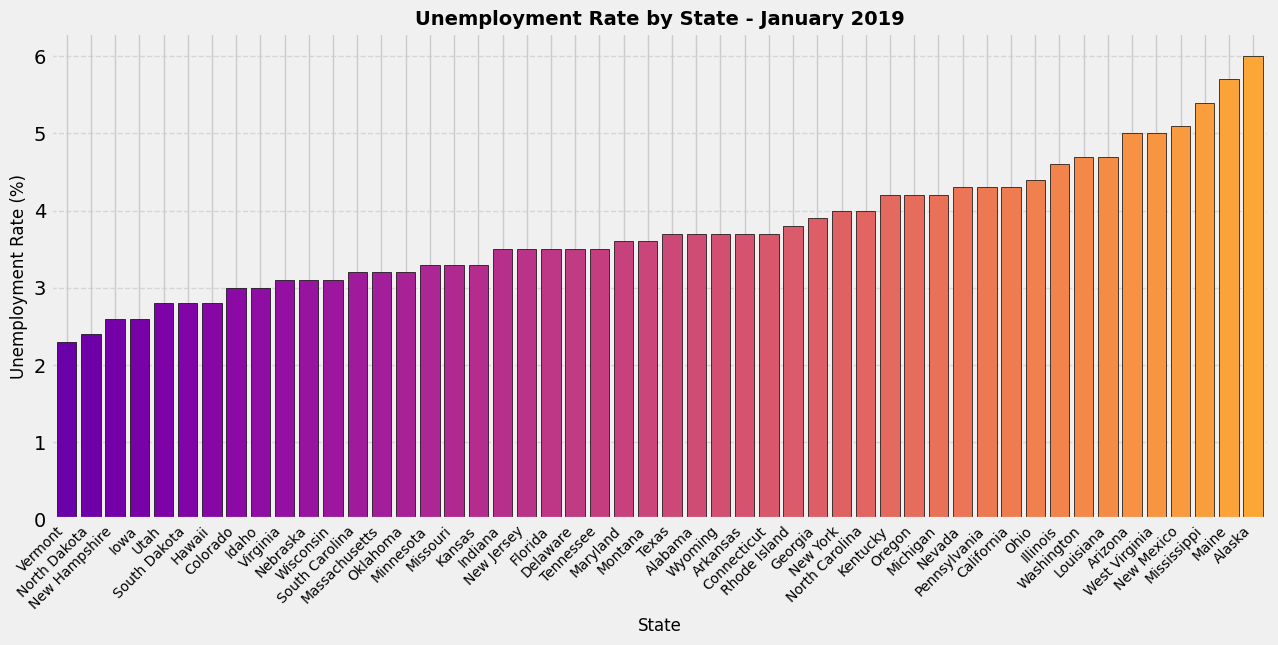

In [83]:
import matplotlib.pyplot as plt
import numpy as np

target_date = pd.to_datetime("2019-01-01")

# Extract unemployment data
if target_date in filtered_unemployment_data.index:
    selected_data = filtered_unemployment_data.loc[target_date].T.sort_values()

    custom_colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(selected_data)))

    # plot
    fig, ax = plt.subplots(figsize=(14, 6))
    selected_data.plot(
        kind='bar', width=0.8, color=custom_colors, edgecolor='black', ax=ax
    )

    ax.set_title(f"Unemployment Rate by State - {target_date.strftime('%B %Y')}", fontsize=14, fontweight='bold')
    ax.set_ylabel("Unemployment Rate (%)", fontsize=12)
    ax.set_xlabel("State", fontsize=12)
    ax.set_xticklabels(selected_data.index, rotation=45, ha="right", fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

else:
    print(f"⚠️ Data for {target_date.strftime('%B %Y')} is not available in the dataset.")


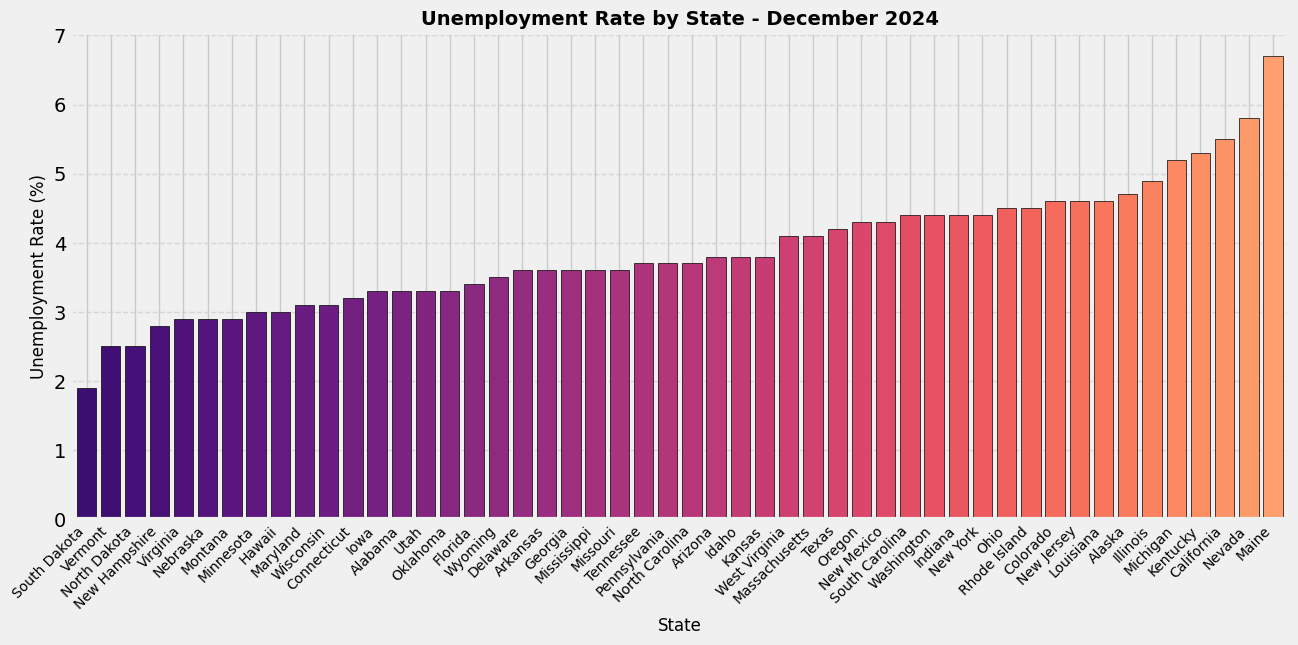

In [84]:
target_date = pd.to_datetime("2024-12-01")

# Extract unemployment data
if target_date in filtered_unemployment_data.index:
    selected_data = filtered_unemployment_data.loc[target_date].T.sort_values()

    custom_colors = plt.cm.magma(np.linspace(0.2, 0.8, len(selected_data)))

    # plot
    fig, ax = plt.subplots(figsize=(14, 6))
    selected_data.plot(
        kind='bar', width=0.8, color=custom_colors, edgecolor='black', ax=ax
    )


    ax.set_title(f"Unemployment Rate by State - {target_date.strftime('%B %Y')}", fontsize=14, fontweight='bold')
    ax.set_ylabel("Unemployment Rate (%)", fontsize=12)
    ax.set_xlabel("State", fontsize=12)
    ax.set_xticklabels(selected_data.index, rotation=45, ha="right", fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

else:
    print(f"⚠️ Data for {target_date.strftime('%B %Y')} is not available in the dataset.")


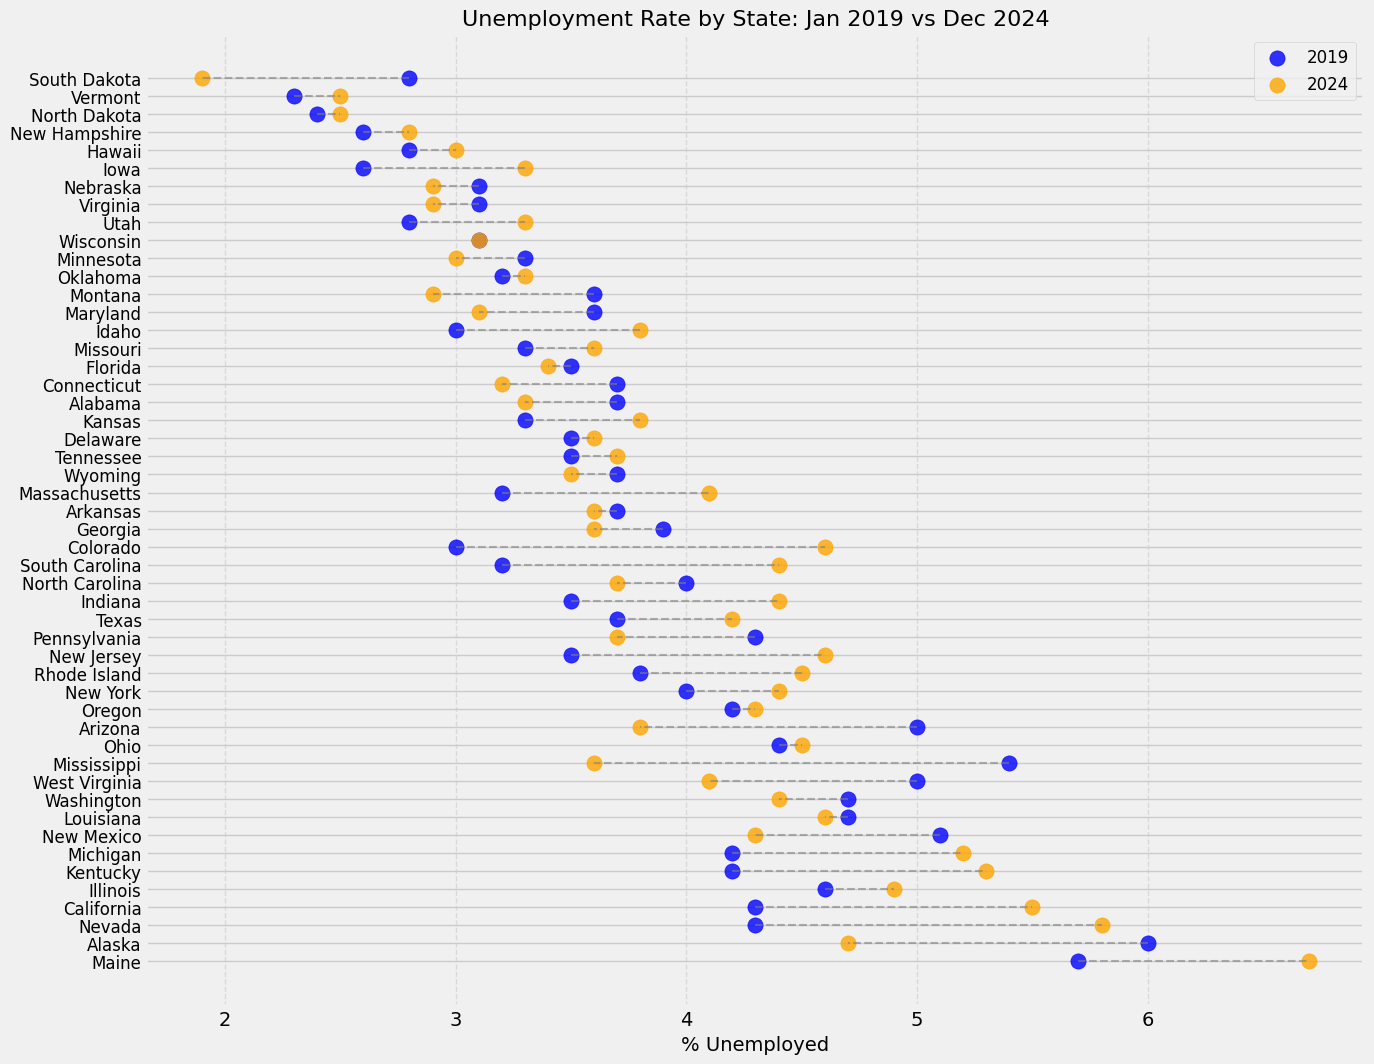

In [85]:
import matplotlib.pyplot as plt
import numpy as np

filtered_unemployment_data.index = pd.to_datetime(filtered_unemployment_data.index)

unemployment_data_2019 = filtered_unemployment_data.loc[filtered_unemployment_data.index == '2019-01-01'].T
unemployment_data_2024 = filtered_unemployment_data.loc[filtered_unemployment_data.index == '2024-12-01'].T

# Avg unemployment rate
combined_data = unemployment_data_2019.merge(unemployment_data_2024, left_index=True, right_index=True, suffixes=('_2019', '_2024'))
combined_data['average'] = (combined_data.iloc[:, 0] + combined_data.iloc[:, 1]) / 2

combined_data = combined_data.sort_values('average', ascending=False)

#plot
fig, ax = plt.subplots(figsize=(14, 12))  # **Larger figure size for better visibility**

states = combined_data.index
y_positions = np.arange(len(states))

ax.scatter(combined_data.iloc[:, 0], y_positions, color='blue', label='2019', alpha=0.8, s=120)

ax.scatter(combined_data.iloc[:, 1], y_positions, color='orange', label='2024', alpha=0.8, s=120)

# Connect 2019---2024
for i, state in enumerate(states):
    ax.plot([combined_data.iloc[i, 0], combined_data.iloc[i, 1]],
            [y_positions[i], y_positions[i]], color='gray', linestyle='--', alpha=0.6, linewidth=1.5)

ax.set_yticks(y_positions)
ax.set_yticklabels(states, fontsize=12)
ax.set_xlabel('% Unemployed', fontsize=14)
ax.set_title('Unemployment Rate by State: Jan 2019 vs Dec 2024', fontsize=16)

ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.legend(fontsize=12)

plt.show()


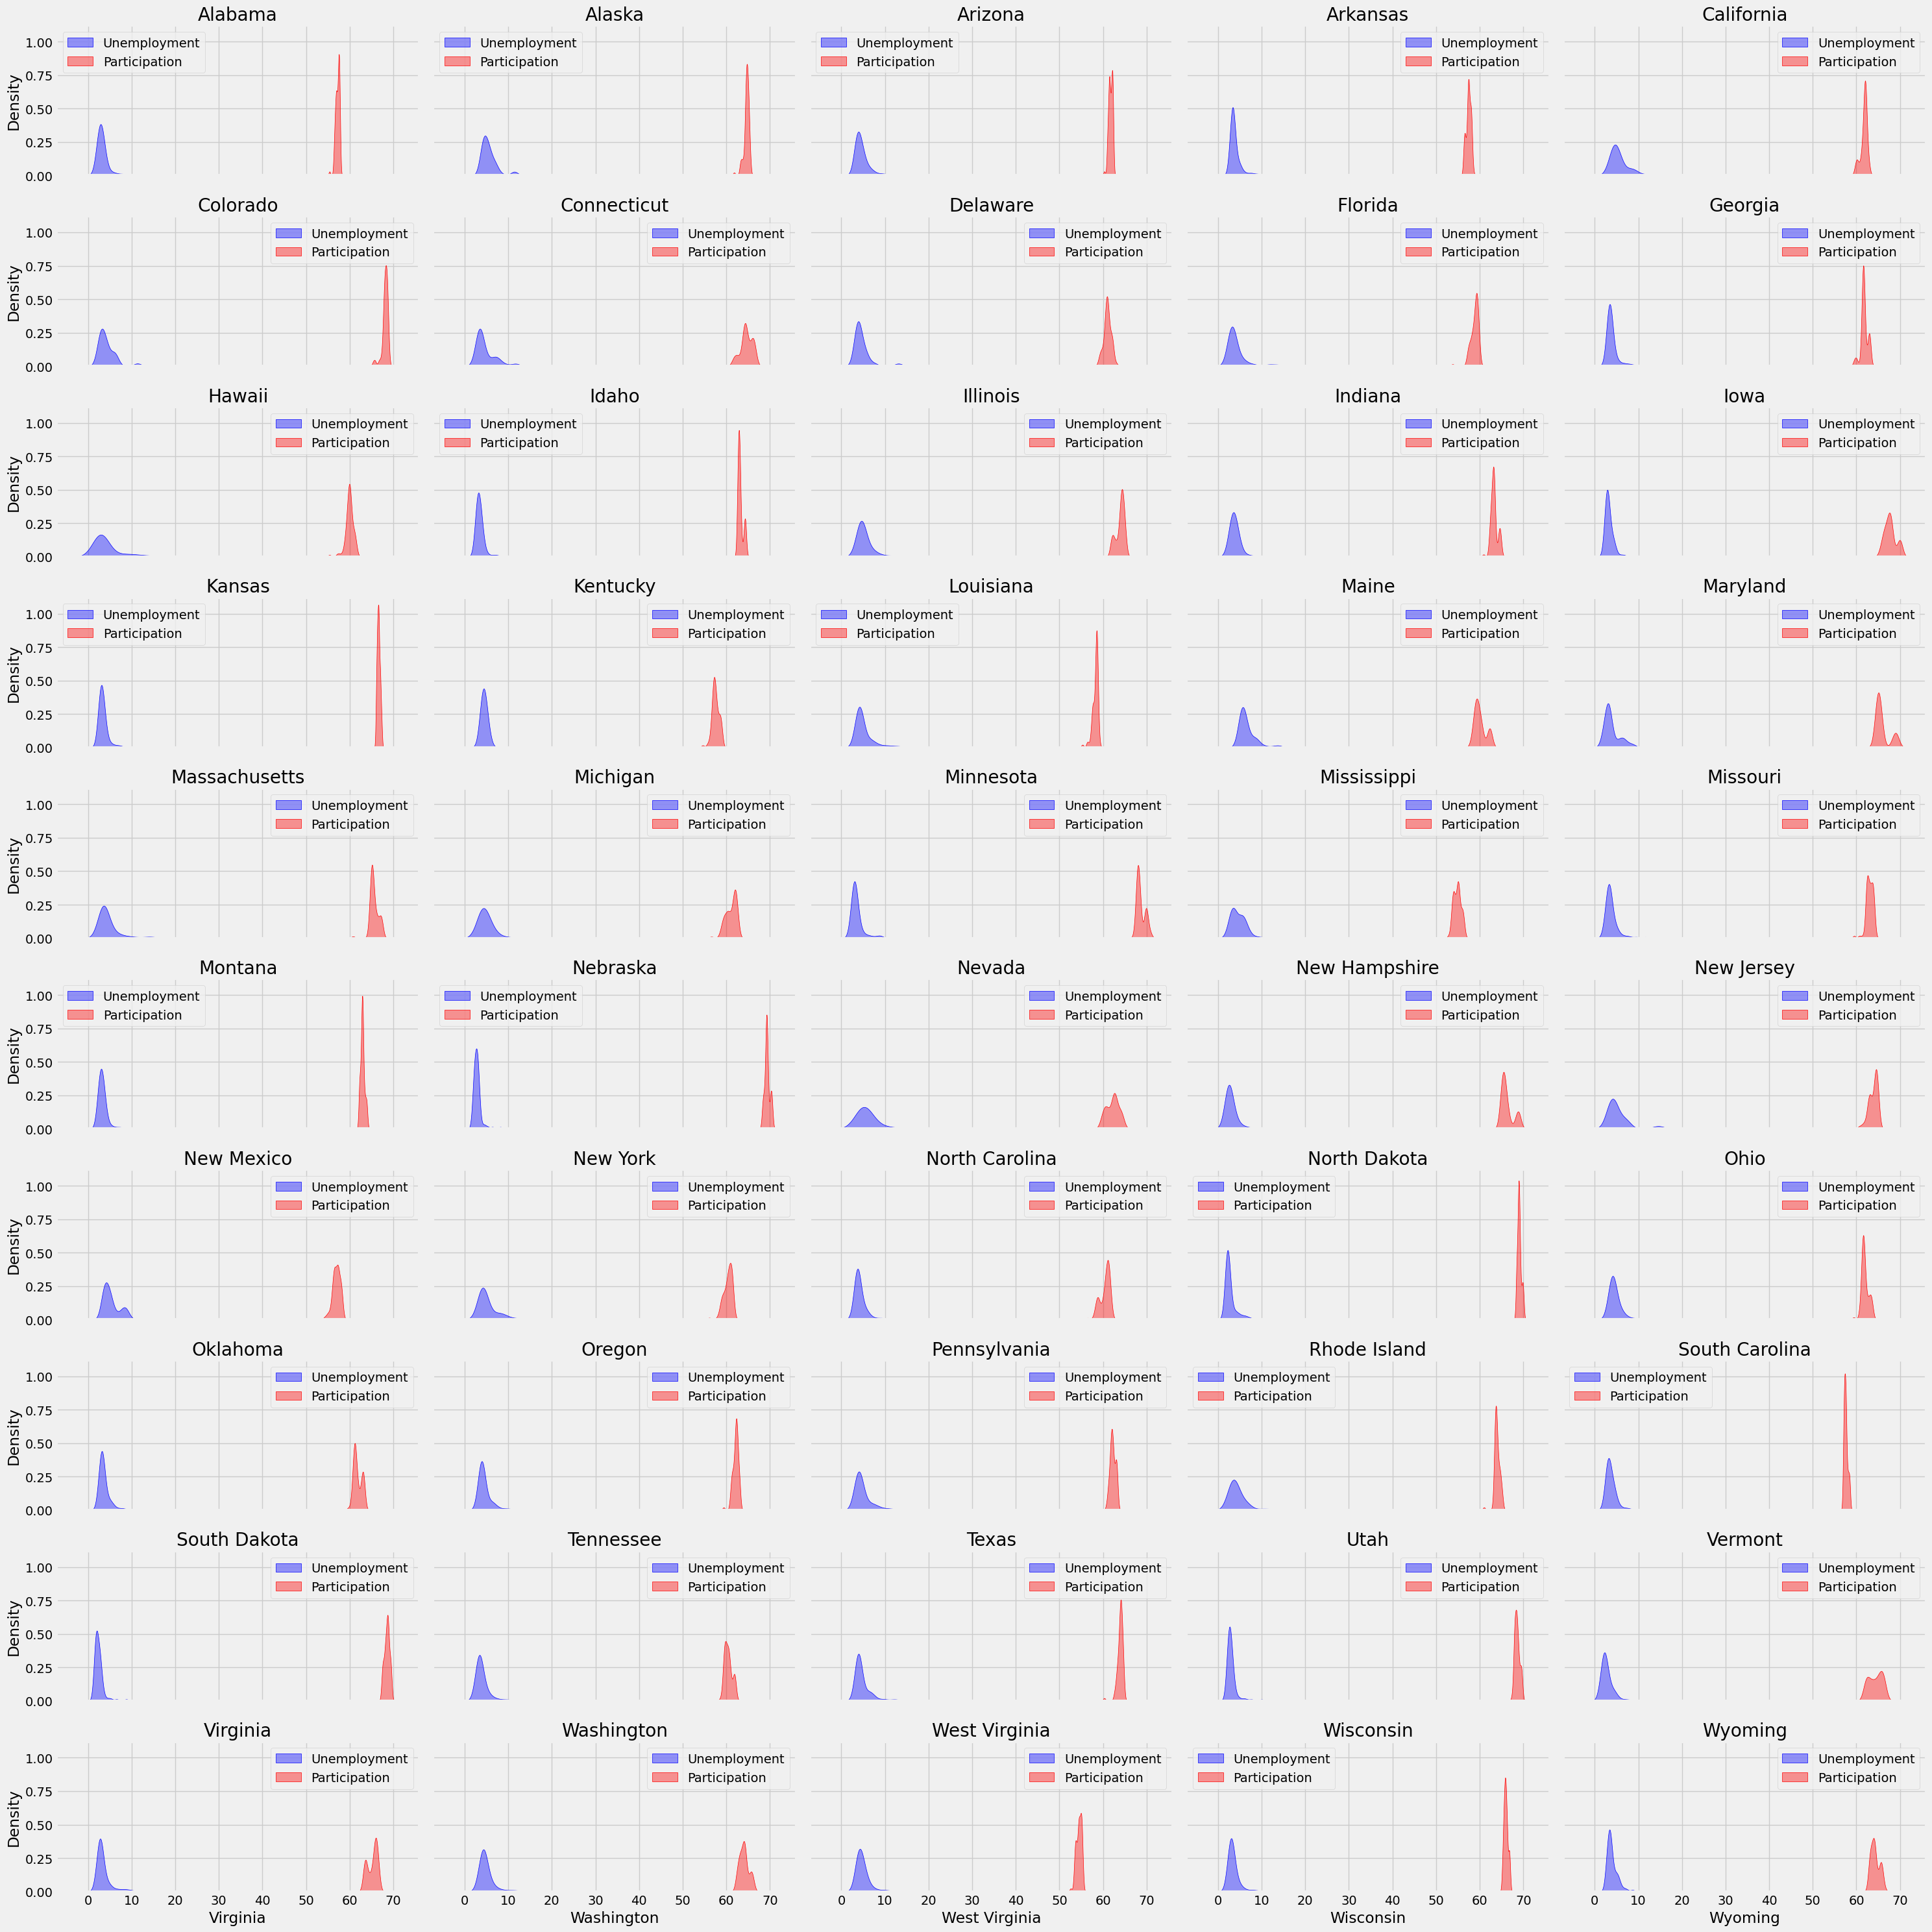

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# participation rate data
participation_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
participation_df = participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

part_id_to_state = participation_df['title'].str.replace('Labor Force Participation Rate for ', '', regex=True).to_dict()

all_participation_results = []

for part_id in participation_df.index:
    part_results = fred.get_series(part_id)
    part_results = part_results.to_frame(name=part_id)
    all_participation_results.append(part_results)
    time.sleep(0.1)  # To avoid getting blocked

# Combine participation rate data
participation_states = pd.concat(all_participation_results, axis=1)
participation_states.columns = [part_id_to_state[part_c] for part_c in participation_states.columns]

#Plot
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True, sharey=True)
axs = axs.flatten()

i = 0
for state in filtered_unemployment_data.columns:
    if state in ["District Of Columbia", "Puerto Rico"]:
        continue  # Skip non-state entity

    unemployment = filtered_unemployment_data.loc['2019':'2024', state]
    participation = participation_states.loc['2019':'2024', state] if state in participation_states.columns else None

    sns.kdeplot(unemployment, ax=axs[i], label='Unemployment', color='blue', fill=True, alpha=0.4)

    if participation is not None:
        sns.kdeplot(participation, ax=axs[i], label='Participation', color='red', fill=True, alpha=0.4)

    axs[i].set_title(state)
    axs[i].legend()
    i += 1

plt.tight_layout()
plt.show()


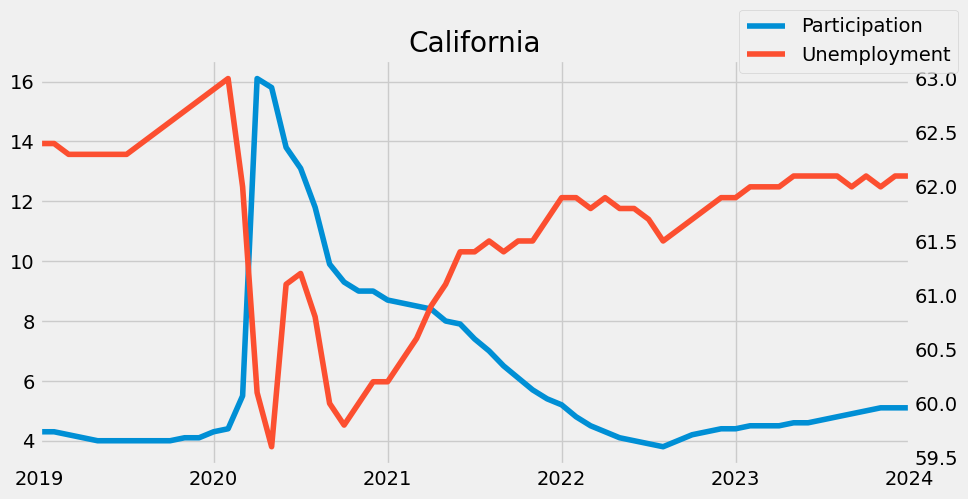

In [87]:
selected_state = 'California'

fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()

filtered_unemployment_data_resampled = filtered_unemployment_data.asfreq('MS')

participation_line = filtered_unemployment_data.query('index >= 2019 and index <= 2024')[selected_state] \
    .plot(ax=ax, label='Participation')
unemployment_line = participation_states.dropna().query('index >= 2019 and index <= 2024')[selected_state] \
    .plot(ax=ax2, label='Unemployment', color=color_pal[1])

ax2.grid(False)

ax.set_title(selected_state)

fig.legend(labels=['Participation','Unemployment'])

plt.show()

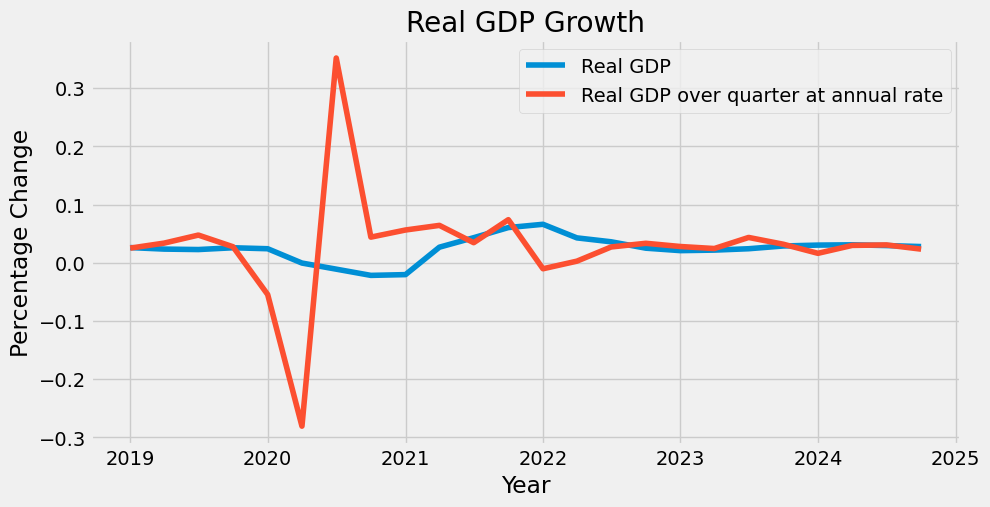

In [88]:
from datetime import date
import pandas_datareader.data as web
import numpy as np
import seaborn as sns

report_start_date = date.fromisoformat('1990-01-01')
report_end_date = date.today()

# Real GDP data from FRED
real_gdp_data = web.get_data_fred('GDPC1', start=report_start_date, end=report_end_date)

real_gdp_quarterly = ((real_gdp_data / real_gdp_data.shift(1)).pow(4) - 1)

real_gdp = real_gdp_data.rolling(4, min_periods=1).mean().pct_change(4).bfill()

real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)
real_gdp['Real GDP over quarter at annual rate'] = real_gdp_quarterly

real_gdp = real_gdp.loc['2019-01-01':]

# Drop remaining NaNs
real_gdp.dropna(inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=real_gdp, dashes=False)
plt.title("Real GDP Growth")
plt.xlabel("Year")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.show()



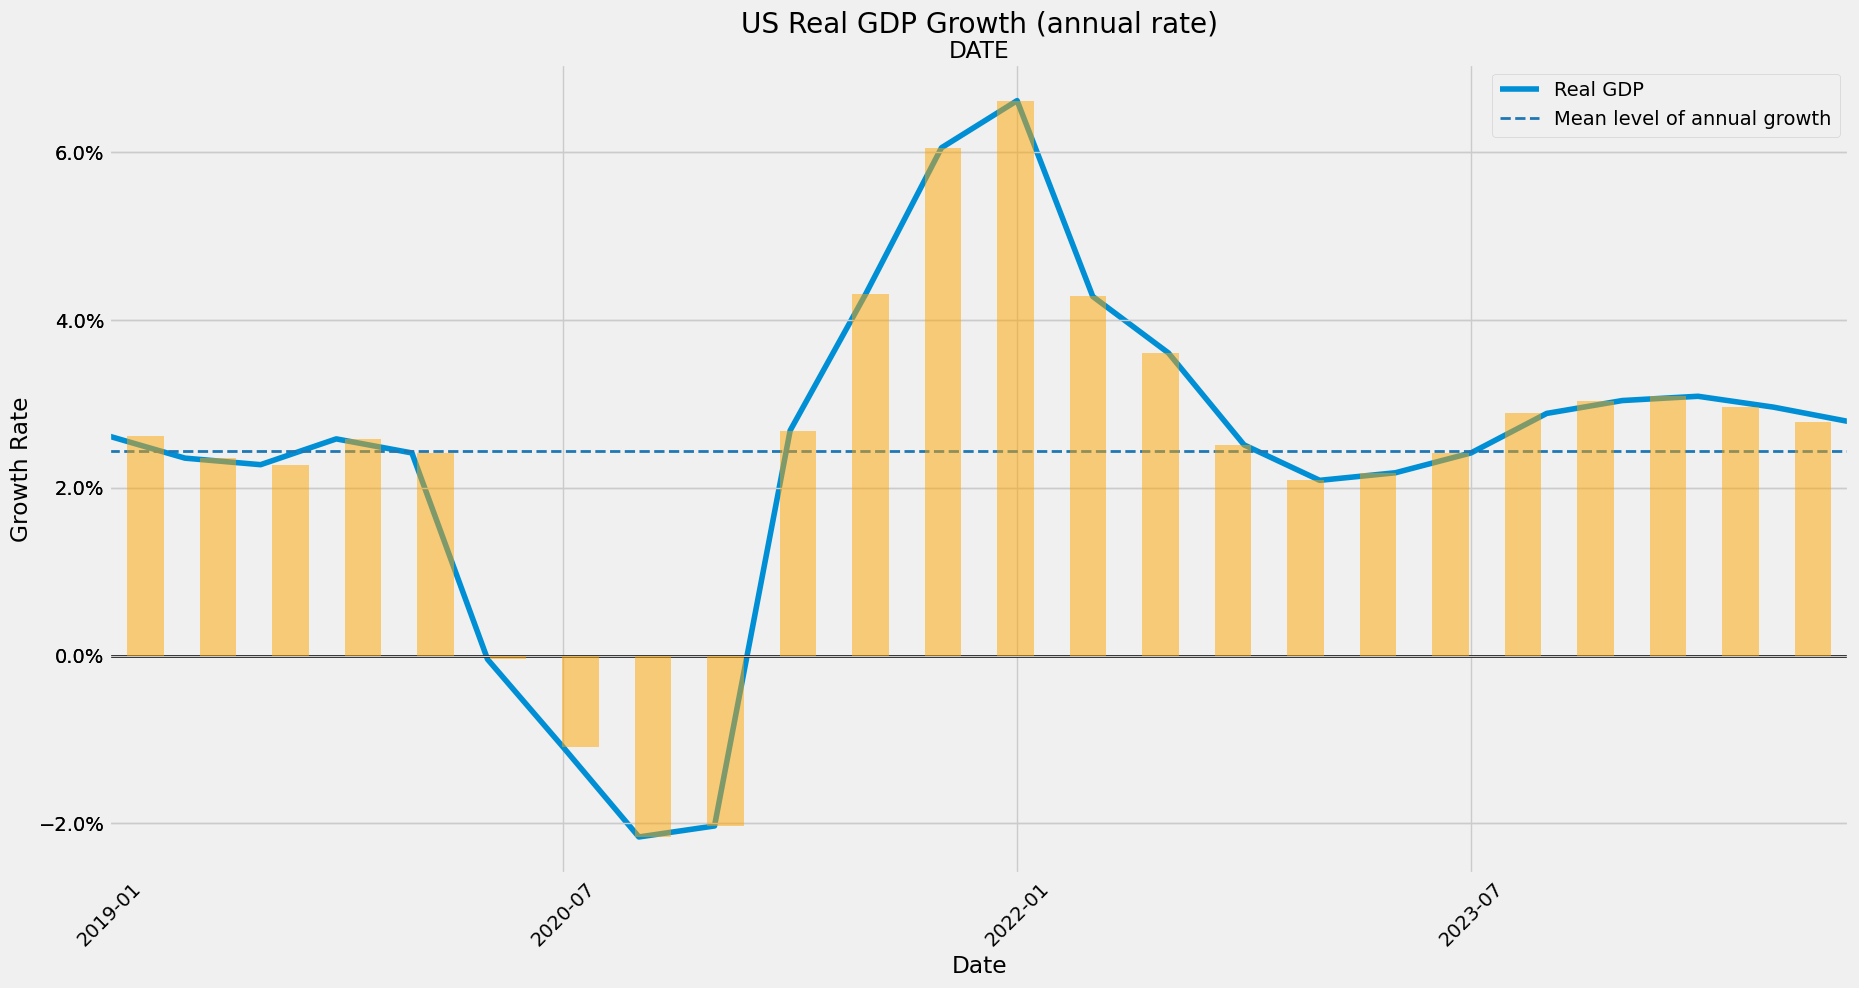

In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10))
real_gdp_growth = real_gdp.iloc[:, 0]

real_gdp_growth.plot(ax=ax, grid=True, title='US Real GDP Growth (annual rate)', rot=45)

ax.set_xticks(real_gdp.index[::6])
ax.set_xticklabels(map('{:%Y-%m}'.format, real_gdp.index[::6]))

mean_growth = real_gdp_growth.mean()
ax.axhline(y=0, lw=2, c='k')
ax.axhline(y=mean_growth, lw=2, ls='--', c='#1f77b4', label='Mean level of annual growth')

ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

ax2 = ax.twiny()
real_gdp_growth.plot.bar(ax=ax2, color='orange', alpha=0.5)

ax2.xaxis.set_major_locator(ticker.NullLocator())

ax.set_xlabel('Date')
ax.set_ylabel('Growth Rate')
ax.legend()

# Show plot
plt.show()

In [90]:
print(f'Mean level of real GDP growth rate since {real_gdp.index[0]:%Y-%m-%d}: {real_gdp.iloc[:,0].mean():.2%}')

Mean level of real GDP growth rate since 2019-01-01: 2.44%


In [107]:
import pandas as pd
import plotly.express as px
import pandas_datareader.data as web
from datetime import date

report_start = date.fromisoformat('2019-01-01')
report_end = date.today()

# Fetch GDP component data from FRED
gdp_components = web.get_data_fred(['RVAAFH', 'RVAM', 'RVAU', 'RVAC', 'RVAMA', 'RVAW', 'RVAR', 'RVAT',
                                    'RVAI', 'RVAFI', 'RVARL', 'RVAPBS', 'RVAES', 'RVAHCSA', 'RVAAERAF',
                                    'RVAOSEG', 'RVAG', 'RVAAI'], start=report_start, end=report_end)

# Column names for GDP components
GDP_COLUMN_NAMES = {
    'RVAAFH': 'Agriculture, Forestry, Fishing, and Hunting',
    'RVAM': 'Mining',
    'RVAU': 'Utilities',
    'RVAC': 'Construction',
    'RVAMA': 'Manufacturing',
    'RVAW': 'Wholesale Trade',
    'RVAR': 'Retail Trade',
    'RVAT': 'Transportation and Warehousing',
    'RVAI': 'Information',
    'RVAFI': 'Finance and Insurance',
    'RVARL': 'Real Estate, Rental, and Leasing',
    'RVAPBS': 'Professional and Business Services',
    'RVAES': 'Educational Services',
    'RVAHCSA': 'Health Care and Social Assistance',
    'RVAAERAF': 'Arts, Entert., Recreat., Accom., and Food Services',
    'RVAOSEG': 'Other Services',
    'RVAG': 'Government',
    'RVAAI': 'Other Industries'
}

gdp_components.rename(columns=GDP_COLUMN_NAMES, inplace=True)
gdp_total = gdp_components.iloc[:, -1]

#Process data
gdp_components.index = pd.to_datetime(gdp_components.index)
gdp_components_quarterly = gdp_components.resample('QE').mean()
gdp_components_quarterly = gdp_components_quarterly.reset_index()

gdp_long = gdp_components_quarterly.melt(id_vars=['DATE'], var_name="Industry", value_name="GDP Value")

#Plot
fig = px.area(
    gdp_long,
    x="DATE",
    y="GDP Value",
    color="Industry",
    title="Composition of US GDP By Sector (2019-Present)",
    labels={"DATE": "Year", "GDP Value": "GDP Contribution (Billions)"},
    hover_name="Industry",
    hover_data={"GDP Value": ":.2f"},
    template="plotly_dark"
)

fig.update_layout(
    yaxis_title="GDP Value Added (Billions)",
    xaxis_title="Year",
    yaxis_tickformat=".2f",
    legend_title="GDP Component"
)

fig.show()


In [92]:
# Calculate the percentage contribution of each GDP component
gdp_components_pct = gdp_components.divide(gdp_components.sum(axis=1), axis=0)

gdp_components_pct.index = pd.to_datetime(gdp_components_pct.index)
gdp_components_pct_quarterly = gdp_components_pct.resample('QE').mean()

#Process data
gdp_components_pct_quarterly = gdp_components_pct_quarterly.reset_index()

print("Column names in DataFrame:", gdp_components_pct_quarterly.columns)

if 'DATE' not in gdp_components_pct_quarterly.columns:
    raise KeyError("Column 'DATE' not found! Ensure index resetting was done properly.")

gdp_long = gdp_components_pct_quarterly.melt(id_vars=['DATE'], var_name="Industry", value_name="Percentage")

# Plot
fig = px.area(
    gdp_long,
    x="DATE",
    y="Percentage",
    color="Industry",
    title="Composition of US GDP By Value Added (By Percentage)",
    labels={"DATE": "Year", "Percentage": "GDP Contribution (%)"},
    hover_name="Industry",
    hover_data={"Percentage": ":.2%"},
    template="plotly_dark"
)

fig.update_layout(yaxis_tickformat=".0%")
fig.show()


Column names in DataFrame: Index(['DATE', 'Agriculture, Forestry, Fishing, and Hunting', 'Mining',
       'Utilities', 'Construction', 'Manufacturing', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate, Rental, and Leasing',
       'Professional and Business Services', 'Educational Services',
       'Health Care and Social Assistance',
       'Arts, Entert., Recreat., Accom., and Food Services', 'Other Services',
       'Government', 'Other Industries'],
      dtype='object')


In [108]:
import pandas as pd
import plotly.express as px

periods = [5, 3]  #Past 5 and 3

#Process data
gdp_total_pct_chg = pd.DataFrame(
    [gdp_total.pct_change(4 * period).iloc[-1] for period in periods],
    index=['Over past {:d} years'.format(period) for period in periods],
    columns=['Percentage Change'])

gdp_components_pct_chg = pd.concat(
    [((gdp_components - gdp_components.shift(4 * period)).divide(gdp_total.shift(4 * period), axis=0)).iloc[-1]
     for period in periods],
    axis=1)
gdp_components_pct_chg.columns = ['Over past {:d} years'.format(period) for period in periods]

gdp_components_pct_chg = gdp_components_pct_chg.reset_index()
gdp_components_pct_chg.rename(columns={'index': 'Industry'}, inplace=True)
gdp_long = gdp_components_pct_chg.melt(id_vars=['Industry'], var_name="Period", value_name="Percentage Change")

#Plot
fig = px.bar(
    gdp_long,
    x="Industry",
    y="Percentage Change",
    color="Period",
    title="Percentage Change in Value Added by Each Component of US GDP",
    labels={"Percentage Change": "Change (%)", "Industry": "GDP Component"},
    text_auto=".2%",
    barmode="group",
    template="plotly_dark"
)

fig.update_layout(
    yaxis_range=[-0.01, 0.15],
    xaxis_tickangle=-30,
    yaxis_tickformat=".2%",
    legend_title="Time Period",
    bargap=0.3,
    bargroupgap=0.1,
    height=700, width=1200
)

fig.show()


In [31]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[0], ascending=False).iloc[:5,:1]

,Industry
5,Wholesale Trade
2,Utilities
7,Transportation and Warehousing
6,Retail Trade
10,"Real Estate, Rental, and Leasing"


In [32]:
gdp_components_pct_chg.sort_values(by=gdp_components_pct_chg.columns[1], ascending=False).iloc[:5,1:]

,Over past 5 years,Over past 3 years
17,0.122677,0.084784
11,0.036271,0.018228
8,0.023446,0.013138
10,0.023067,0.013152
13,0.013458,0.011594


In [75]:
import plotly.graph_objects as go
import pandas as pd
import pandas_datareader.data as web
from datetime import date

gdp_periods = {
    'Before 2020': (pd.to_datetime('2010-01-01'), pd.to_datetime('2020-01-01')),
    'Between 2020 and 2022': (pd.to_datetime('2020-01-01'), pd.to_datetime('2022-12-31')),
    'After 2022': (pd.to_datetime('2022-01-01'), pd.Timestamp.today())
}
report_start = date.fromisoformat('2019-01-01')
report_end = date.today()

# Fetch GDP data for each period
gdp_data = {}
for period, (start_date, end_date) in gdp_periods.items():
    gdp = web.get_data_fred('GDPC1', start=start_date, end=end_date)
    gdp_data[period] = gdp

# Convert data into a single DataFrame
gdp_df = pd.DataFrame()
for period, data in gdp_data.items():
    gdp_df = pd.concat([gdp_df, data.assign(Period=period)], axis=0)

gdp_df.reset_index(inplace=True)
gdp_df.rename(columns={'index': 'Date', 'GDPC1': 'GDP'}, inplace=True)

#Plot
fig = go.Figure()

for period in gdp_df['Period'].unique():
    subset = gdp_df[gdp_df['Period'] == period]
    fig.add_trace(go.Scatter(
        x=subset['DATE'],
        y=subset['GDP'],
        mode='markers',
        marker=dict(size=subset['GDP'] / 1000, opacity=0.6),
        name=period
    ))

fig.update_layout(
    title="Bubble Chart: GDP Trends Over Time",
    xaxis_title="Year",
    yaxis_title="Real GDP",
    plot_bgcolor="white",
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    legend=dict(title="Economic Periods", x=0.02, y=0.98)
)

fig.show()


Index(['DATE', 'GDP', 'Period'], dtype='object')


In [67]:
real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

mean_gdp_data = []

for period, data in gdp_data.items():
    # Calculate the mean GDP for the period
    mean_gdp = data['GDPC1'].mean()
    mean_gdp_data.append({'Period': period, 'Mean GDP': mean_gdp})

mean_gdp_df = pd.DataFrame(mean_gdp_data)

print(mean_gdp_df)

                  Period      Mean GDP
0            Before 2020  18633.665805
1  Between 2020 and 2022  21265.737250
2             After 2022  22669.811583


In [22]:
from datetime import date

report_start = date.fromisoformat('2010-01-01')
report_end = date.today()

real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

real_gdp_quarterly = ((real_gdp/real_gdp.shift(1)).pow(4)-1)

real_gdp = real_gdp.rolling(4).mean().pct_change(4, fill_method='bfill')

<ipython-input-22-bd9178d1fc5a>:10: FutureWarning: The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  real_gdp = real_gdp.rolling(4).mean().pct_change(4, fill_method='bfill')


In [69]:
before_2020_range = ('2010-01-01', '2020-01-01')
between_2020_2022_range = ('2020-01-01', '2022-12-31')
post_2022_range = ('2022-01-01', '2025-10-01')

# Mean GDP for each interval
mean_gdp_before_2020 = real_gdp.loc[before_2020_range[0]:before_2020_range[1]].mean()
mean_gdp_between_2019_2022 = real_gdp.loc[between_2020_2022_range[0]:between_2020_2022_range[1]].mean()
mean_gdp_post_2022 = real_gdp.loc[post_2022_range[0]:post_2022_range[1]].mean()

mean_gdp_intervals_df = pd.DataFrame({
    'Interval': ['Before 2020', 'Between 2020 and 2022', 'Post 2022'],
    'Mean GDP': [mean_gdp_before_2020['GDPC1'], mean_gdp_between_2019_2022['GDPC1'], mean_gdp_post_2022['GDPC1']]
})

print(mean_gdp_intervals_df)

                Interval      Mean GDP
0            Before 2020  20711.184800
1  Between 2020 and 2022  21265.737250
2              Post 2022  22669.811583


In [26]:
ffr = web.get_data_fred('DFF', start=report_start, end=report_end)

In [32]:
import plotly.express as px

# Filter data
ffr_subset = ffr.loc['2020':'2025']

fig = px.area(
    ffr_subset,
    x=ffr_subset.index,
    y=ffr_subset.columns[0],
    title="Change in Interest Rates (2020-2025)",
    labels={"index": "Date", ffr_subset.columns[0]: "DFF (Federal Funds Rate)"},
    color_discrete_sequence=["red"]
)

fig.update_xaxes(title="Date")
fig.update_yaxes(title="DFF (Federal Funds Effective Rate)")
fig.update_layout(
    showlegend=False,
    plot_bgcolor="white",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)

fig.show()


In [116]:
import pandas as pd

combined_data = pd.read_csv('/content/cleaned_combined_layoffs_2020_2025.csv')
combined_data

,Company,Location HQ,Industry,# Laid Off,Percentage,Date,Stage,Country,$ Raised (mm)
0,D-ID,Tel Aviv,AI,22.0,25%,2025-03-10,NaN,Israel,$48
1,Zonar Systems,Seattle,Logistics,NaN,NaN,2025-03-09,Acquired,United States,$50
2,Wayfair,Boston,Retail,340.0,NaN,2025-03-07,Post-IPO,Germany,"$1,700"
3,Hewlett Packard Enterprise,SF Bay Area,Hardware,2500.0,5%,2025-03-06,Post-IPO,United States,"$1,400"
4,LiveRamp,SF Bay Area,Marketing,65.0,5%,2025-03-05,Post-IPO,United States,$16
...,...,...,...,...,...,...,...,...,...
2711,Service,Los Angeles,Travel,NaN,1.0,2020-03-16,Seed,United States,5.1
2712,HopSkipDrive,Los Angeles,Transportation,8.0,0.1,2020-03-13,Unknown,United States,45.0
2713,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
2714,Tamara Mellon,Los Angeles,Retail,20.0,0.4,2020-03-12,Series C,United States,90.0


In [126]:
import plotly.graph_objects as go
import pandas as pd
import pandas_datareader.data as web
from datetime import date
from sklearn.preprocessing import MinMaxScaler

report_start = date.fromisoformat('2010-01-01')
report_end = date.today()

# Data fetch
real_gdp = web.get_data_fred('GDPC1', start=report_start, end=report_end)

real_gdp = real_gdp.resample('YE').mean()
real_gdp['Year'] = real_gdp.index.year
real_gdp.rename(columns={'GDPC1': 'Real GDP'}, inplace=True)


#Processing data
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

combined_data['Year'] = combined_data['Date'].dt.year

annual_layoffs = combined_data.groupby('Year')['# Laid Off'].sum().reset_index()

#Merging Data
merged_df = pd.merge(real_gdp, annual_layoffs, on='Year', how='inner')

# Rolling mean for Smoothing
merged_df["Smoothed Layoffs"] = merged_df["# Laid Off"].rolling(2, min_periods=1).mean()

scaler = MinMaxScaler()

merged_df[['Normalized GDP', 'Normalized Smoothed Layoffs']] = scaler.fit_transform(
    merged_df[['Real GDP', 'Smoothed Layoffs']]
)


fig = go.Figure()

#Plots
fig.add_trace(go.Scatter(
    x=merged_df["Year"],
    y=merged_df["Normalized GDP"],
    mode='lines+markers',
    name="Normalized GDP",
    line=dict(color="blue", width=3),
    marker=dict(size=8),
    yaxis="y1"
))

fig.add_trace(go.Scatter(
    x=merged_df["Year"],
    y=merged_df["Normalized Smoothed Layoffs"],
    mode='lines+markers',
    name="Normalized Smoothed Layoffs",
    line=dict(color="red", width=3, dash="dash"),
    marker=dict(size=8),
    yaxis="y2"
))

fig.update_layout(
    title="Comparison of Normalized GDP & Smoothed Layoffs Over Time",
    xaxis=dict(
        title="Year",
        dtick=1,
        showgrid=True,
        gridcolor="lightgray"
    ),
    yaxis=dict(
        title="Normalized GDP (0-1 Range)",
        side="left",
        showgrid=False
    ),
    yaxis2=dict(
        title="Normalized Smoothed Layoffs (0-1 Range)",
        side="right",
        overlaying="y",
        showgrid=False
    ),
    legend=dict(
        title="Metric",
        x=0.75,
        y=0.2,
        orientation="v",
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1
    ),
    plot_bgcolor="white",
    height=600,
    width=900
)

fig.show()


In [127]:
import plotly.express as px
import pandas as pd

combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')
combined_data['Year'] = combined_data['Date'].dt.year

# Aggregate total layoffs per year
annual_layoffs = combined_data.groupby('Year')['# Laid Off'].sum().reset_index()

# Plot
layoffs_plot = px.line(
    annual_layoffs,
    x='Year',
    y='# Laid Off',
    title='Trends of Layoffs Over the Years',
    labels={'Year': 'Year', '# Laid Off': 'Total Layoffs'},
    color_discrete_sequence=px.colors.sequential.Plasma,
)

layoffs_plot.update_traces(mode='lines+markers', marker=dict(size=10))

#Layout adjustment
layoffs_plot.update_layout(
    autosize=False,
    width=800,
    height=500,
    xaxis=dict(dtick=1),
    yaxis=dict(title='Total Layoffs'),
    showlegend=False,
    plot_bgcolor="white",
    xaxis_title="Year",
)

layoffs_plot.show()


In [129]:
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import zscore

annual_layoffs['Year'] = pd.to_numeric(annual_layoffs['Year'], errors='coerce')

#Z-score normalization
annual_layoffs['Z_Laid Off'] = zscore(annual_layoffs['# Laid Off'])
ffr_subset_z = ffr_subset.apply(zscore)

fig = go.Figure()

# 1. Interest Rate Trends
for i, column in enumerate(ffr_subset.columns):
    fig.add_trace(go.Scatter(
        x=ffr_subset.index,
        y=ffr_subset_z[column],
        mode='lines',
        name='Interest Rate' if i == 0 else None,
        line=dict(color='blue', dash='dash')  # Dashed blue line for interest rates
    ))

# 2. Layoffs Trend
fig.add_trace(go.Scatter(
    x=annual_layoffs['Year'],
    y=annual_layoffs['Z_Laid Off'],
    mode='lines+markers',
    name="Layoffs",
    marker=dict(size=10, color='red'),
    line=dict(color='red', width=2)
))

fig.update_layout(
    title="Comparison of Normalized Interest Rate Changes & Layoffs (2020-2025)",
    xaxis_title="Year",
    yaxis_title="Z-Score Normalized Value",
    height=700,
    plot_bgcolor="white",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    legend=dict(orientation="h", x=0.3, y=1.1),
)

fig.show()
